In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from collections import Counter
import cv2
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets, transforms

In [ ]:
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.RandomCrop(224),
    transforms.ToTensor(),
    ])
train_dataset = datasets.Flowers102('data', split = 'train', download=True, transform=transform)
valid_dataset = datasets.Flowers102('data', split = 'val', download=True, transform=transform)
test_dataset = datasets.Flowers102('data', split = 'test', download=True,transform=transform)

100%|██████████| 344862509/344862509 [00:17<00:00, 19229229.54it/s]


Extracting data/flowers-102/102flowers.tgz to data/flowers-102


100%|██████████| 502/502 [00:00<00:00, 582445.53it/s]


100%|██████████| 14989/14989 [00:00<00:00, 15101710.94it/s]


In [ ]:
def visualize(image, label):
  image = image.permute(1, 2, 0)
  image = image.numpy()
  plt.figure()
  plt.imshow(image)
  plt.title(str(label))
  plt.xticks([])
  plt.yticks([])


In [ ]:
train_dataset[0][0].shape

torch.Size([3, 224, 224])

In [ ]:
print(train_dataset[55][0].shape)

torch.Size([3, 224, 224])


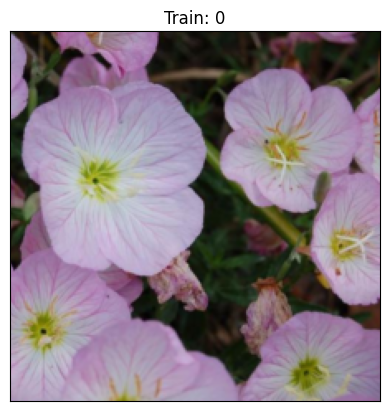

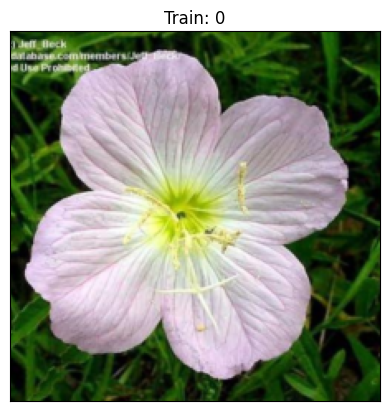

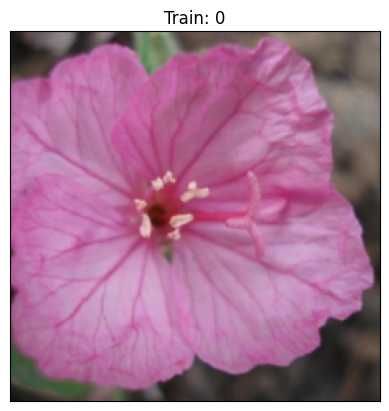

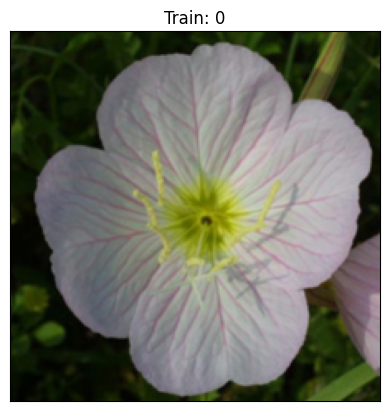

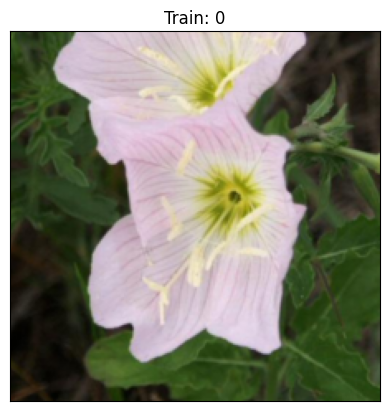

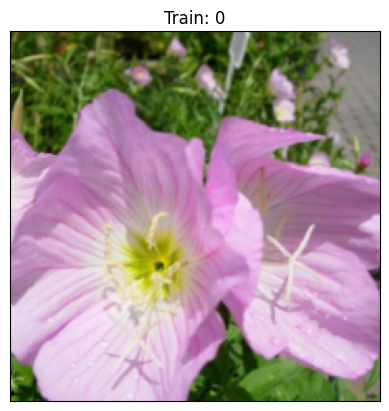

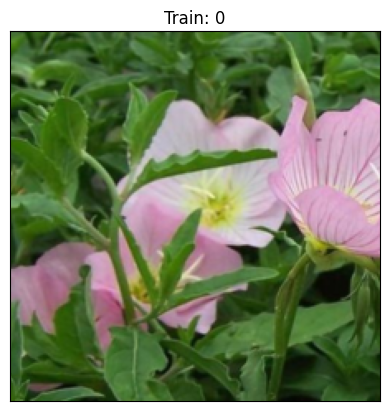

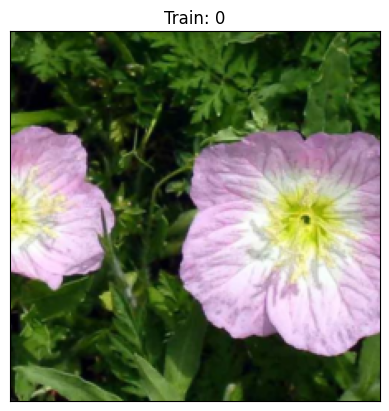

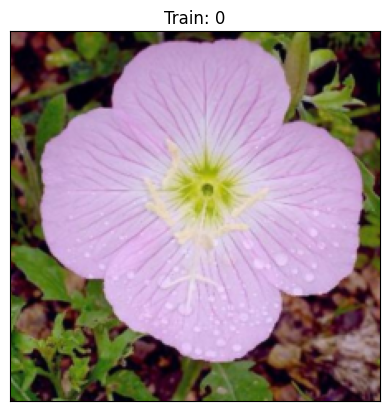

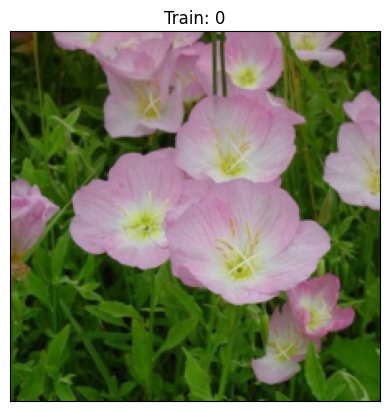

In [ ]:
train_examples = [train_dataset[i] for i in range(10)]
for image, label in train_examples:
  visualize(image, f'Train: {label}')

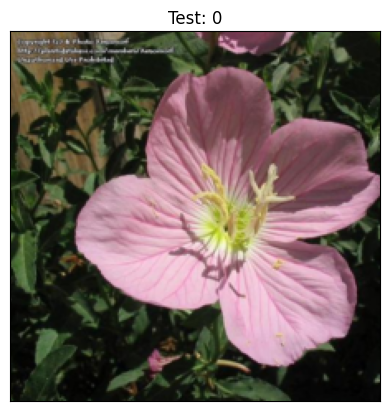

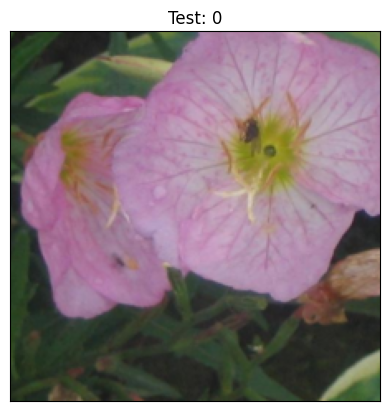

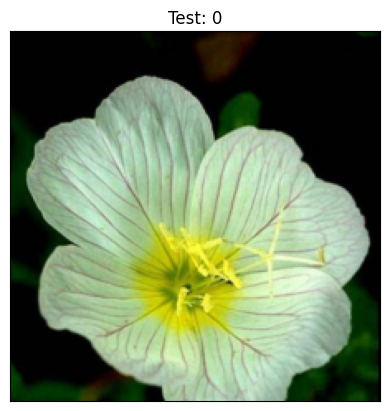

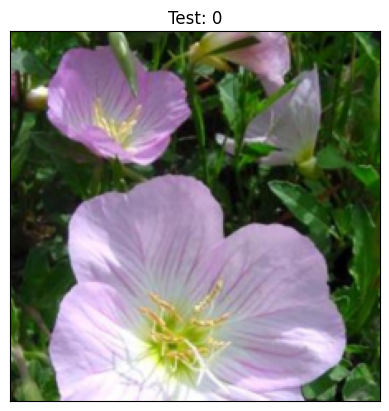

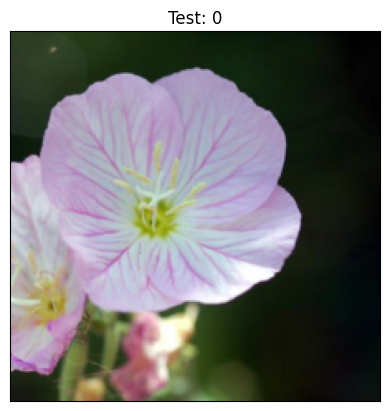

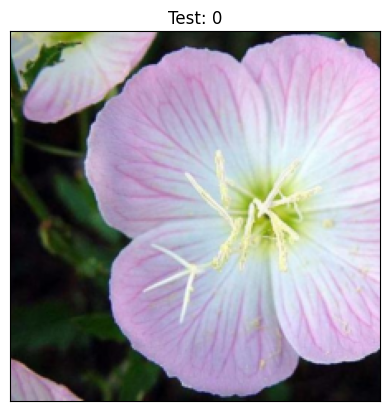

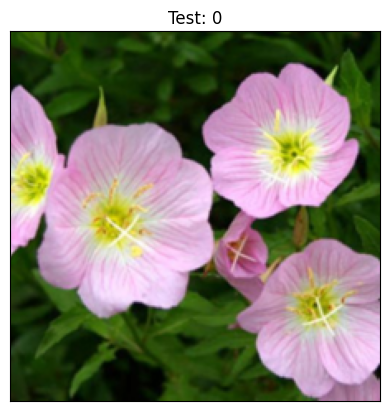

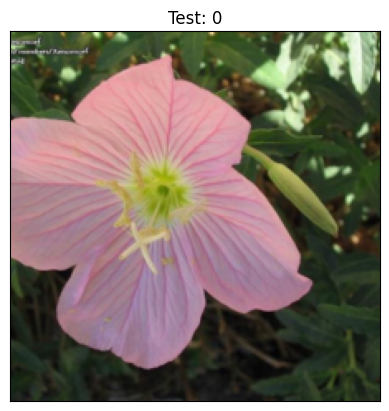

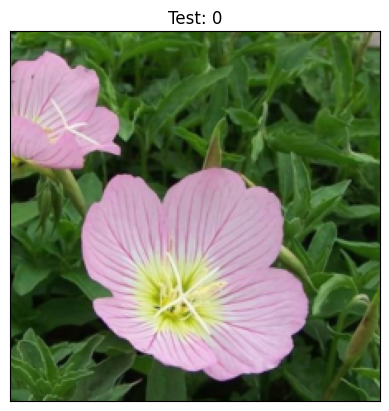

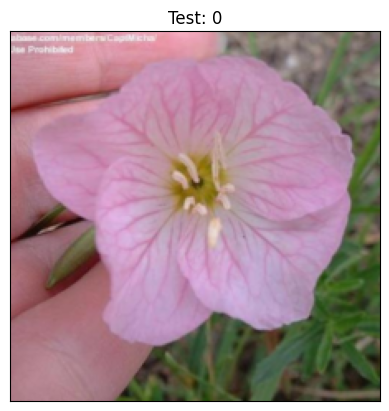

In [ ]:
train_examples = [valid_dataset[i] for i in range(10)]
for image, label in train_examples:
  visualize(image, f'Test: {label}')


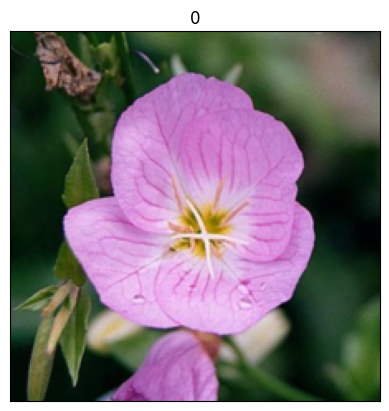

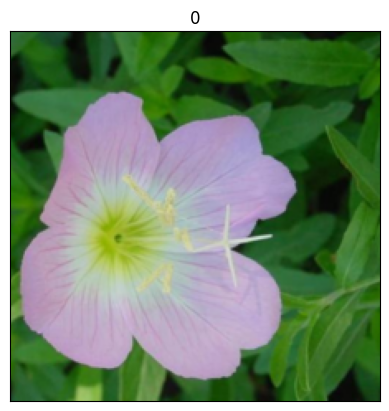

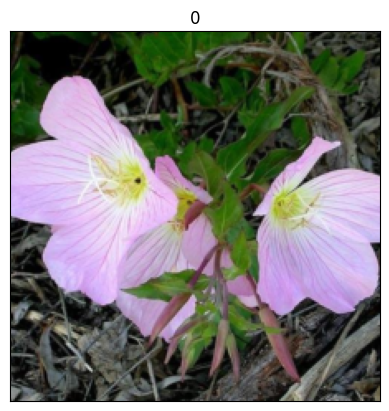

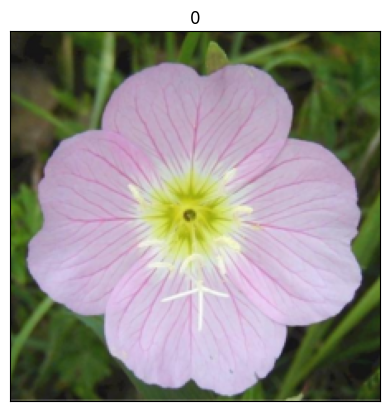

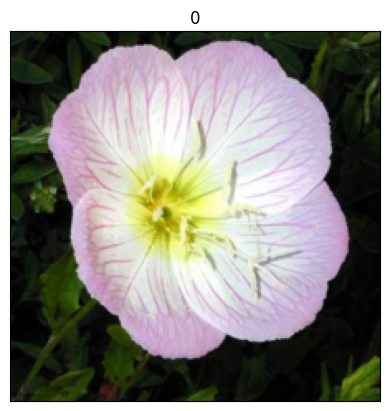

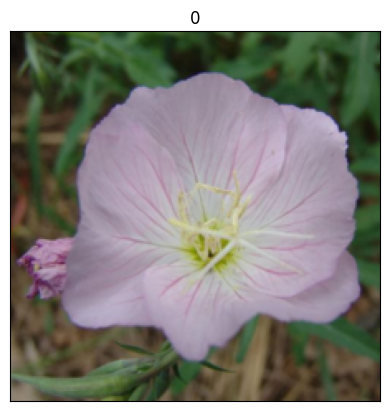

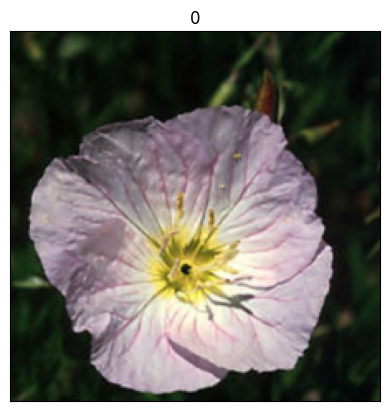

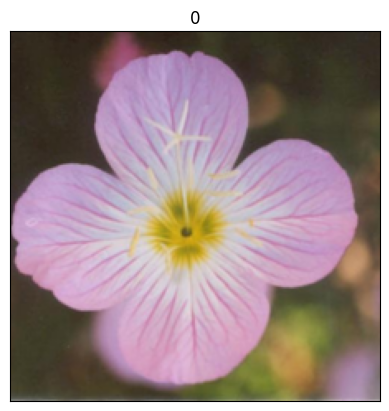

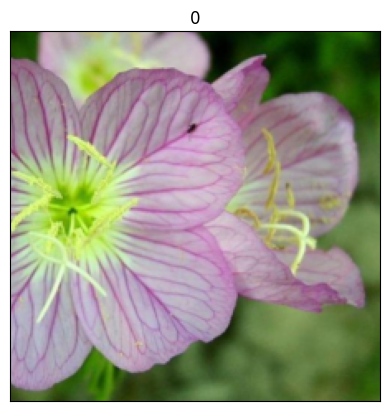

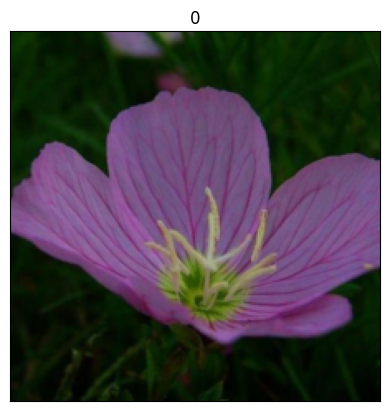

In [ ]:
test_examples = [test_dataset[i] for i in range(10)]
for image, label in test_examples:
  visualize(image, label)

In [ ]:
training_labels  = [train_dataset[i][1] for i in range(len(train_dataset))]
set(training_labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101}

In [ ]:
test_labels  = [test_dataset[i][1] for i in range(len(test_dataset))]
set(test_labels)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101}

In [ ]:
Counter(training_labels)

Counter({0: 10,
         1: 10,
         2: 10,
         3: 10,
         4: 10,
         5: 10,
         6: 10,
         7: 10,
         8: 10,
         9: 10,
         10: 10,
         11: 10,
         12: 10,
         13: 10,
         14: 10,
         15: 10,
         20: 10,
         16: 10,
         17: 10,
         18: 10,
         19: 10,
         21: 10,
         22: 10,
         23: 10,
         24: 10,
         25: 10,
         26: 10,
         27: 10,
         28: 10,
         29: 10,
         30: 10,
         31: 10,
         32: 10,
         33: 10,
         34: 10,
         35: 10,
         36: 10,
         37: 10,
         38: 10,
         39: 10,
         40: 10,
         41: 10,
         42: 10,
         43: 10,
         44: 10,
         45: 10,
         46: 10,
         47: 10,
         48: 10,
         49: 10,
         50: 10,
         51: 10,
         52: 10,
         53: 10,
         54: 10,
         55: 10,
         56: 10,
         57: 10,
         58: 10,
       

In [ ]:
Counter(test_labels)

Counter({0: 20,
         1: 40,
         2: 20,
         3: 36,
         4: 45,
         5: 25,
         6: 20,
         7: 65,
         8: 26,
         9: 25,
         10: 67,
         11: 67,
         12: 29,
         13: 28,
         14: 29,
         15: 21,
         20: 20,
         16: 65,
         17: 62,
         18: 29,
         19: 36,
         21: 39,
         22: 71,
         23: 22,
         24: 21,
         25: 21,
         26: 20,
         27: 46,
         28: 58,
         29: 65,
         30: 32,
         31: 25,
         32: 26,
         33: 20,
         34: 23,
         35: 55,
         36: 88,
         37: 36,
         38: 21,
         39: 47,
         40: 107,
         41: 39,
         42: 110,
         43: 73,
         44: 20,
         45: 176,
         46: 47,
         47: 51,
         48: 29,
         49: 72,
         50: 238,
         51: 65,
         52: 73,
         53: 41,
         54: 51,
         55: 89,
         56: 47,
         57: 94,
         58: 47,
   

In [ ]:

train_image_sizes = [train_dataset[i][0].shape for i in range(len(train_dataset))]
set(train_image_sizes)

{torch.Size([3, 224, 224])}

In [ ]:
test_image_sizes = [test_dataset[i][0].shape for i in range(len(test_dataset))]
set(test_image_sizes)

## You can alternatively define the model as an object.
Note that you need to define the __init__ method and forward method. PyTorch takes care of the backward method for you.

In [ ]:
class VGG16(nn.Module):
    def __init__(self, num_channels, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            #
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(in_features=7*7*512, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(inplace=True),
            nn.Linear(in_features=4096, out_features=num_classes)
        )


    def forward(self, x):
      x = self.features(x)
      x = self.flatten(x)
      x = self.classifier(x)
      return x

In [ ]:
model = VGG16(num_channels=3, num_classes=102)

In [ ]:
batch_size = 8
train_loader = DataLoader(train_dataset, batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu");
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [ ]:
def evaluation(model, loader, criterion, device, phase='Valid'):
  model.eval()
  predictions = []
  ground_truth = []
  with torch.no_grad():
    total_loss = 0
    total  = 0
    correct = 0
    for batch_index, (images, labels) in enumerate(loader):
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      loss = criterion(outputs, labels)
      total_loss += loss.item() * images.size(0)
      total += images.size(0)
      _, preds = torch.max(outputs, 1)
      predictions.extend(preds.cpu().numpy())
      ground_truth.extend(labels.cpu().numpy())
      correct += (preds == labels).sum().item()
    accuracy = correct / total
    loss = total_loss / total
    print(f'     {phase} Accuracy={accuracy:<10.4f}  Loss= {loss:<10.4f}')
    return {'loss': loss,
            'accuracy': accuracy,
            'ground_truth': ground_truth,
            'predictions': predictions}

In [ ]:
def training(model, train_loader, valid_loader, criterion, optimizer, device,
             epochs, best_model_path):
  model.train()
  best_loss = torch.inf
  best_restults = None
  for epoch in range(epochs):
    total_loss = 0
    total  = 0
    correct = 0
    for batch_index, (images, labels) in enumerate(train_loader):
      optimizer.zero_grad()
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      total_loss += loss.item() * images.size(0)
      total += images.size(0)
      _, preds = torch.max(outputs, 1)
      correct += (preds == labels).sum().item()
    accuracy = correct / total
    loss = total_loss / total
    print(f'{epoch:<4} Train Accuracy={accuracy:<10.4f}  Loss= {loss:<10.4f}')
    results = evaluation(model, valid_loader, criterion, device)
    if results['loss'] < best_loss:
      torch.save(model, best_model_path)
      best_loss = results['loss']
      best_restults = results
    print()
  return best_restults

In [ ]:
epochs = 100
best_model_path = 'best_model.pt'
best_restults = training(model, train_loader, valid_loader, criterion,
                         optimizer, device, epochs, best_model_path)

## Testing the last model


In [ ]:
results = evaluation(model, test_loader, criterion, device, 'Test')

## Testing the best model


In [ ]:
best_model = torch.load(best_model_path)
results = evaluation(best_model, test_loader, criterion, device, 'Test')